# TP AGENTS CONVERSATIONNELS : TP rasa (version 2.8)

### Tutoriel disponible en ligne

Accéder à la page suivante : https://rasa.com/docs/rasa/2.x/
A travers cette page, procéder aux différentes étapes de développement d'un chatbot. Ce notebook sert de compte rendu et devra être déposé à l'issue des séances. Travail individuel ou en binôme. 

NOM ETUDIANT : 

### ENVIRONNEMENT DE TRAVAIL MFJA ou PC PERSO  

# PARTIE 1 : ETUDE DU CHATBOT DE BASE


#### Comment interprétez-vous le contenu de ce fichier 
Ce fichier contient un ensemble d'intentions et leurs exemples, qui traduisent en acte de dialogue ce que l'utilisateur dit. 
#### Combien d'intents et lesquelles ? 
Il y a 7 intent : bot_challenge, mood_happy, mood_great, deny, affirm, goodbye, greet
#### Combien d'entités et lesquelles ? 
il n'y a pas d'entités cependant



#### Comment interprétez-vous le contenu de ce fichier ? Chacune des 3 parties ? 
##### Language : en 
indique la langue dans laquelle le chatbot interprétera les dialogues
##### Pipeline :
Processus de sequençage des input, permet de customiser le model et ses embeddings
##### Policies :
Donne la marche à suivre dans les conversations. elles peuvent être basée sur du ML et/ou des règles

#### Comment interprétez-vous le contenu de ce fichier ? 
Ce fichier décrit les différents déroulement de dialogue
#### Combien de stories ? 
Il y en a 3
#### Quel rôle ? 
##### happy path : 
donne un enchainement de réponses si l'orateur a un intent mood_happy en réponse à l'action utter_greet
##### sad path 1: 
donne un enchainement de réponses si l'orateur a un intent mood_unhappy en réponse à l'action utter_greet, puis un intent affirm suite à l'action utter_did_that_help
##### sad path 2: 
donne un enchainement de réponses si l'orateur a un intent mood_unhappy en réponse à l'action utter_greet, puis un intent deny suite à l'action utter_did_that_help


#### Comment interprétez-vous le contenu de ce fichier ? 
Ce fichier donne les règles à suivre en cas d'intent goodbye et bot_challenge
#### Combien de règles ? 
il y a 2 règles : Say goodbye anytime the user says goodbye & Say 'I am a bot' anytime the user challenges
#### Quel rôle ? 
répondre utter_goodbye lorsque l'orateur dit goodbye et utter_iambot en cas de bot_challenge


#### Comment interprétez-vous le contenu de ce fichier ? 
Il décris les actions que le chatbot pourra faire lors d'une conversation
#### Chacune des parties ? 
##### session_config
renseigne le temps d'attente max de chaque discussion & la mémoire des slots
##### intents:
renseigne les intends possible que l'orateur peut proposer au bot
##### responses:
défini les actions que le chatbot pourra effectuer, ie les réponses de départ



# PARTIE 2 : APPRENTISSAGE ET EVALUATION DU CHATBOT

#### Comment interprétez-vous cette trace ? 
Dans un premier temps, il y a une analyse des données d'entrainement
Puis l'entrainement séquenciel des différentes pipeline pour obtenir un model NLU
Enfin l'entrainement des story blocks,rules, trackers & actions pour obtenir un model core
#### Faites le lien avec le fichier config.yml et commentez ce que vous pensez avoir compris. 
le config.yml donne les instructions du training, pour obtenir les model core et nlu.
le model NLU (natural language processing) apprend au model à comprendre les intent & entities, tandis que le core model illustre ce comment le chatbot doit répondre, soit de la gestion de dialogue



#### Comment interprétez-vous le contenu de ce fichier ? 
Ce fichier propose des exemples de dialogues sur lesquels tester notre chatbot une fois entrainé
#### Combien y-at-il de story de test ? 
Il y a 7 story de test : bot challenge, say goodbye, sad path 3, sad path 2, sad path 1, happy path 1, happy path 2
#### Combien y-a-t'il de tour de parole utilisateur ? 
16 tours de parole utilisateur
#### Combien y-a-t'il d'actions ? 
19 actions de la par du chatbot



#### Comment interprétez vous cette trace ? 
Dans un premier temps, acquisition du fichier de test et du model
puis les différentes évaluations : end-to-end, action (via model core), intent (via nlu core), affichant les matrices de confusions normalisée
#### Quels liens pouvez-vous faire avec le contenu du fichier de test ? 
les 7 stories sont testée par notre chatbot, leurs actions et intent analysé et prédit
#### Quelles sont les différentes étapes du test ? 
l'import du model et du test
l'évaluation end to end des stories
l'évaluation des action puis des intent, avec leurs résultats sauvegardé ds leurs fichier respectif

Matrice de confusion des intentions : elle décrit un comportement quasi exemplaire, malgré une erreur

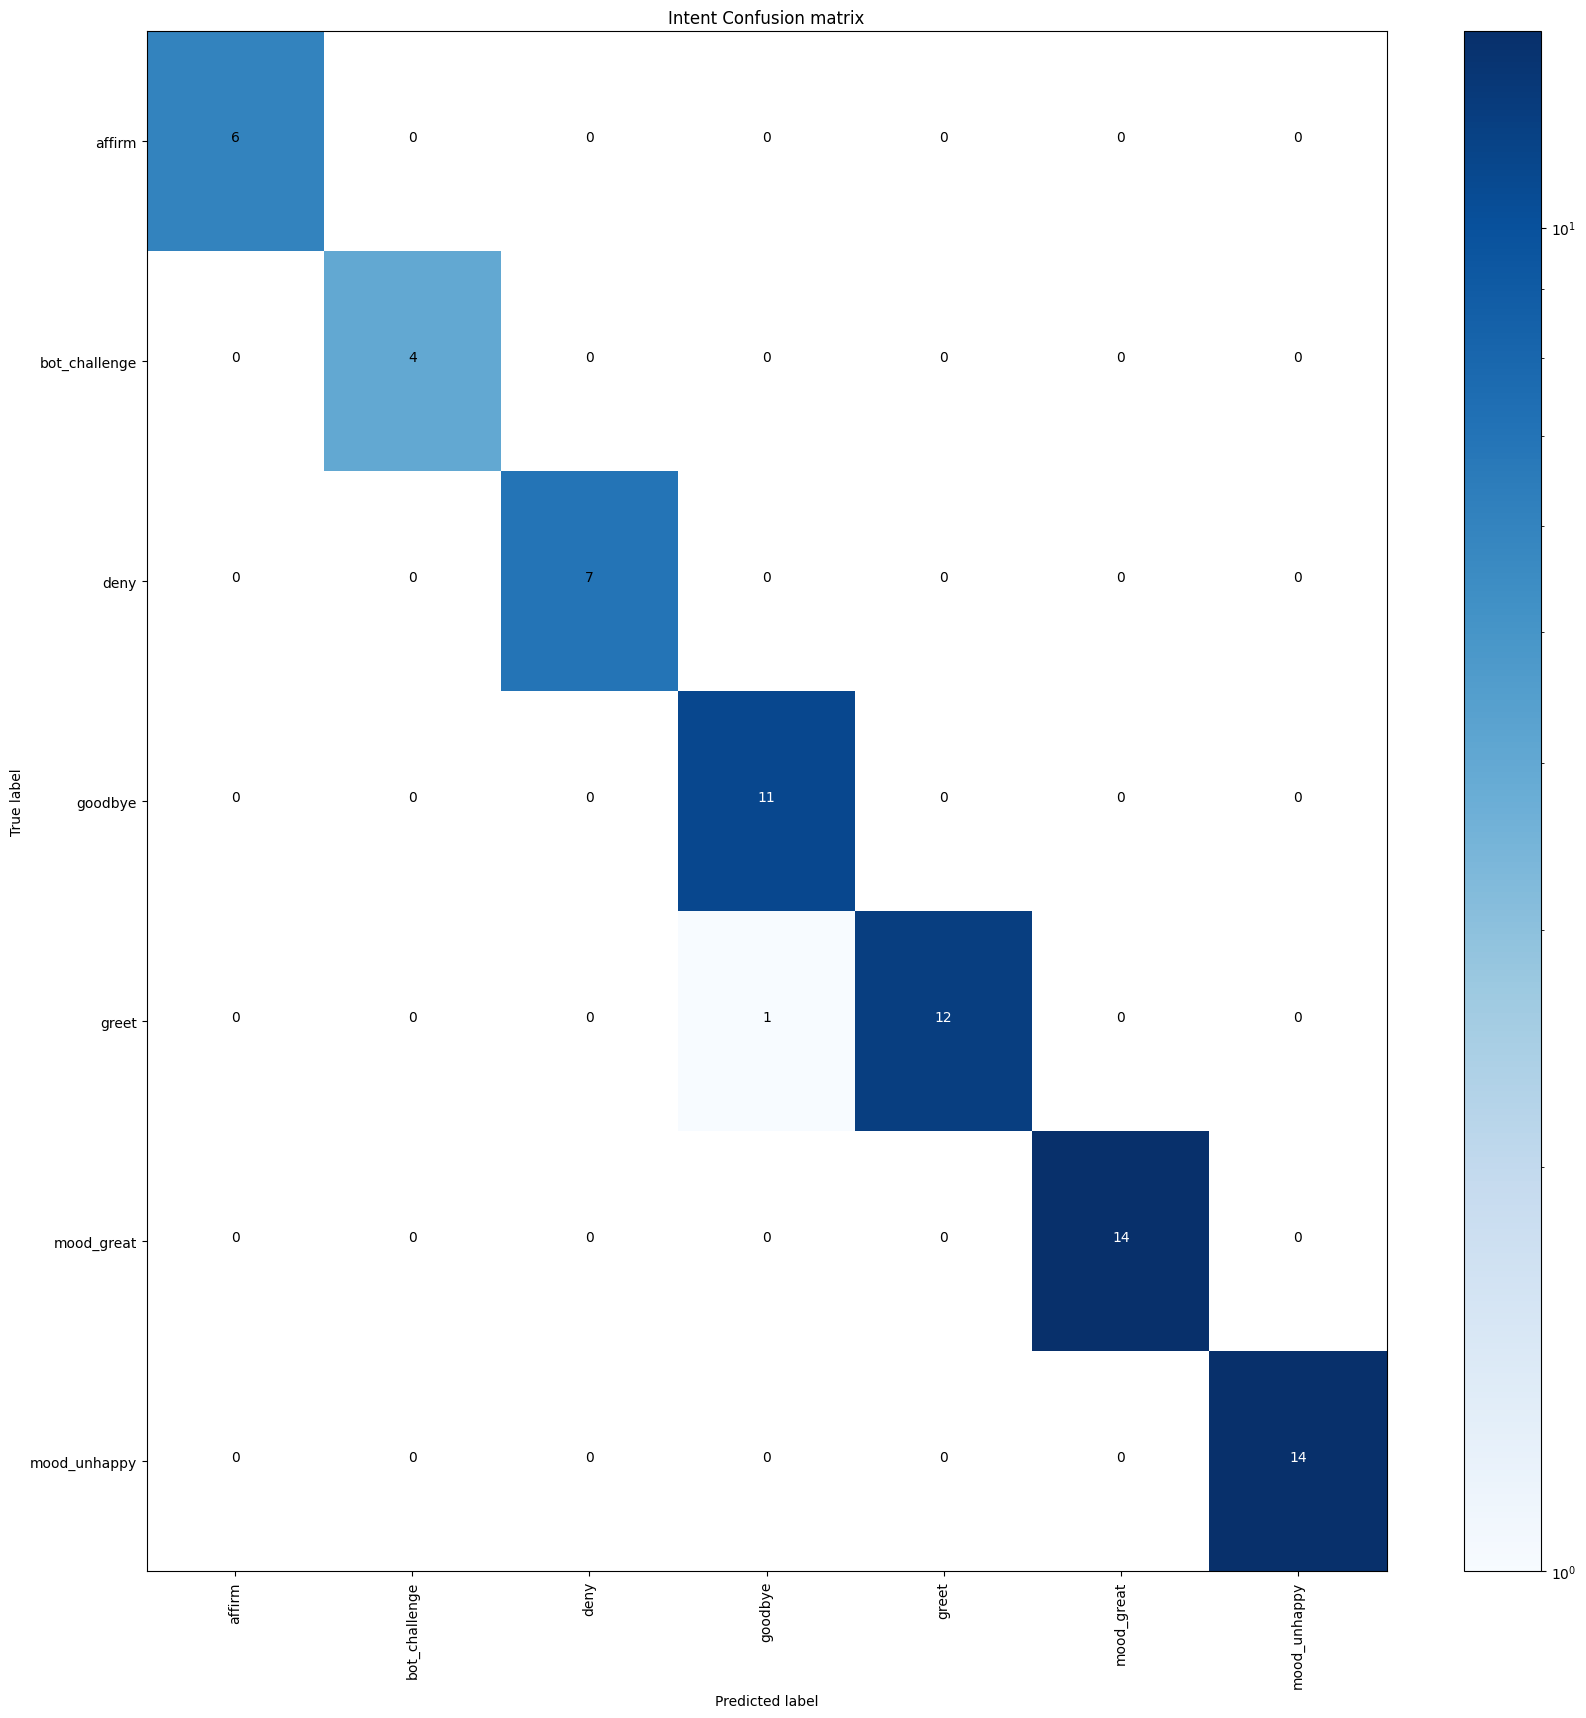

Histogramme de confiance de prédiction des intentions, en fonction du nombre d'exemples données : indique une erreur pour un exemple

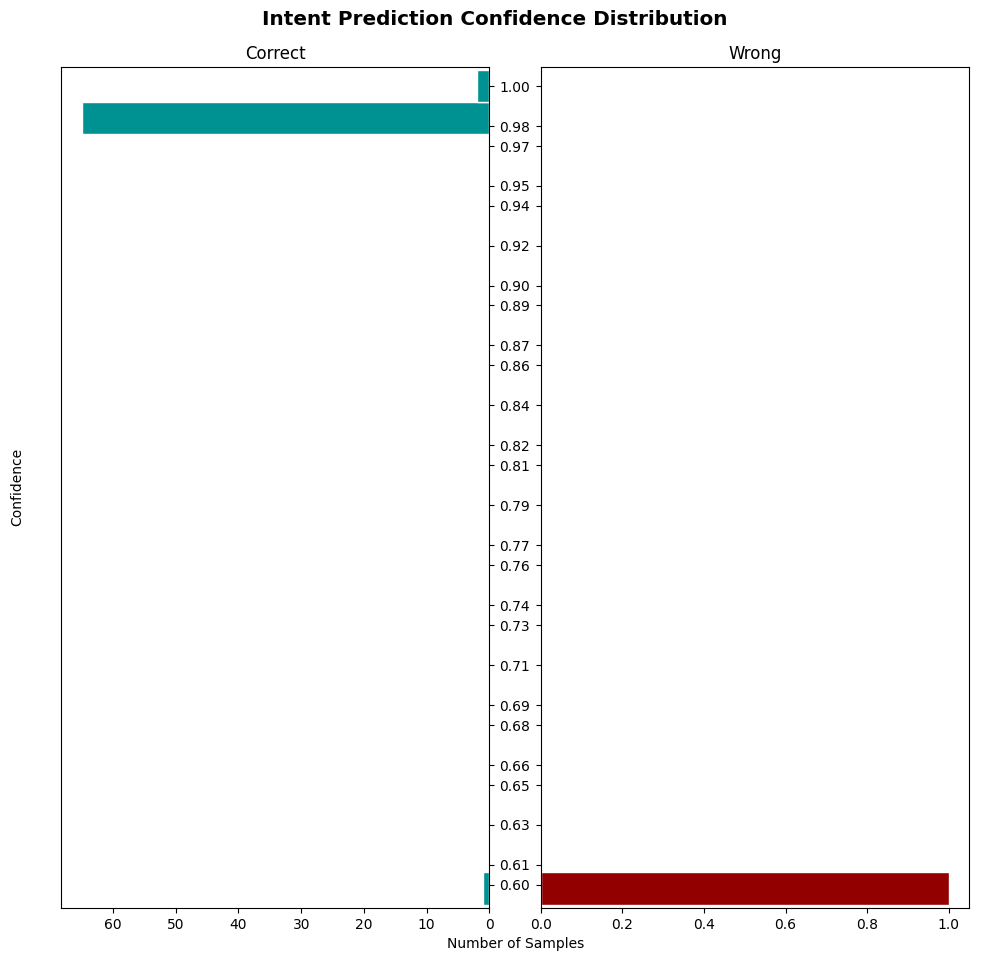

intent_errors.json :

intent_report.json :


#### A quoi correspondent-il ? 
le intent_errors indique l'intent mal compris
le intent_report stock les statistiques de chaque intents
#### Quelle informations peut-on en déduire ?  
Vous pouvez consulter internet pour comprendre le rôle des métriques utilisées en complément du cours 4 EVALUATION, par exemple : 

https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1



du intent_errors, que l'intent greet good afternoon est confondu avec l'intent goodbye

du intent_report, la manière dont le model opère, en terme de precision et de recall, ainsi qu'une valeur f1 permettant de le comparer à un autre modèle si désiré, les macro et weighted avg. On y trouve également les listes de confusion inter intent. support represente le nombre d'exemples

#### Que concluez-vous ? 
que malgrès la confusion, les scénarios de tests ont été validé


#### A quoi correspond-il ce fichier ? 
à l'évaluation de la validité des prédiction sur les stories

ELle correspond à la matrice de confusion entre les actions attendue par les story blocks et les actions effctuées par le chatbot

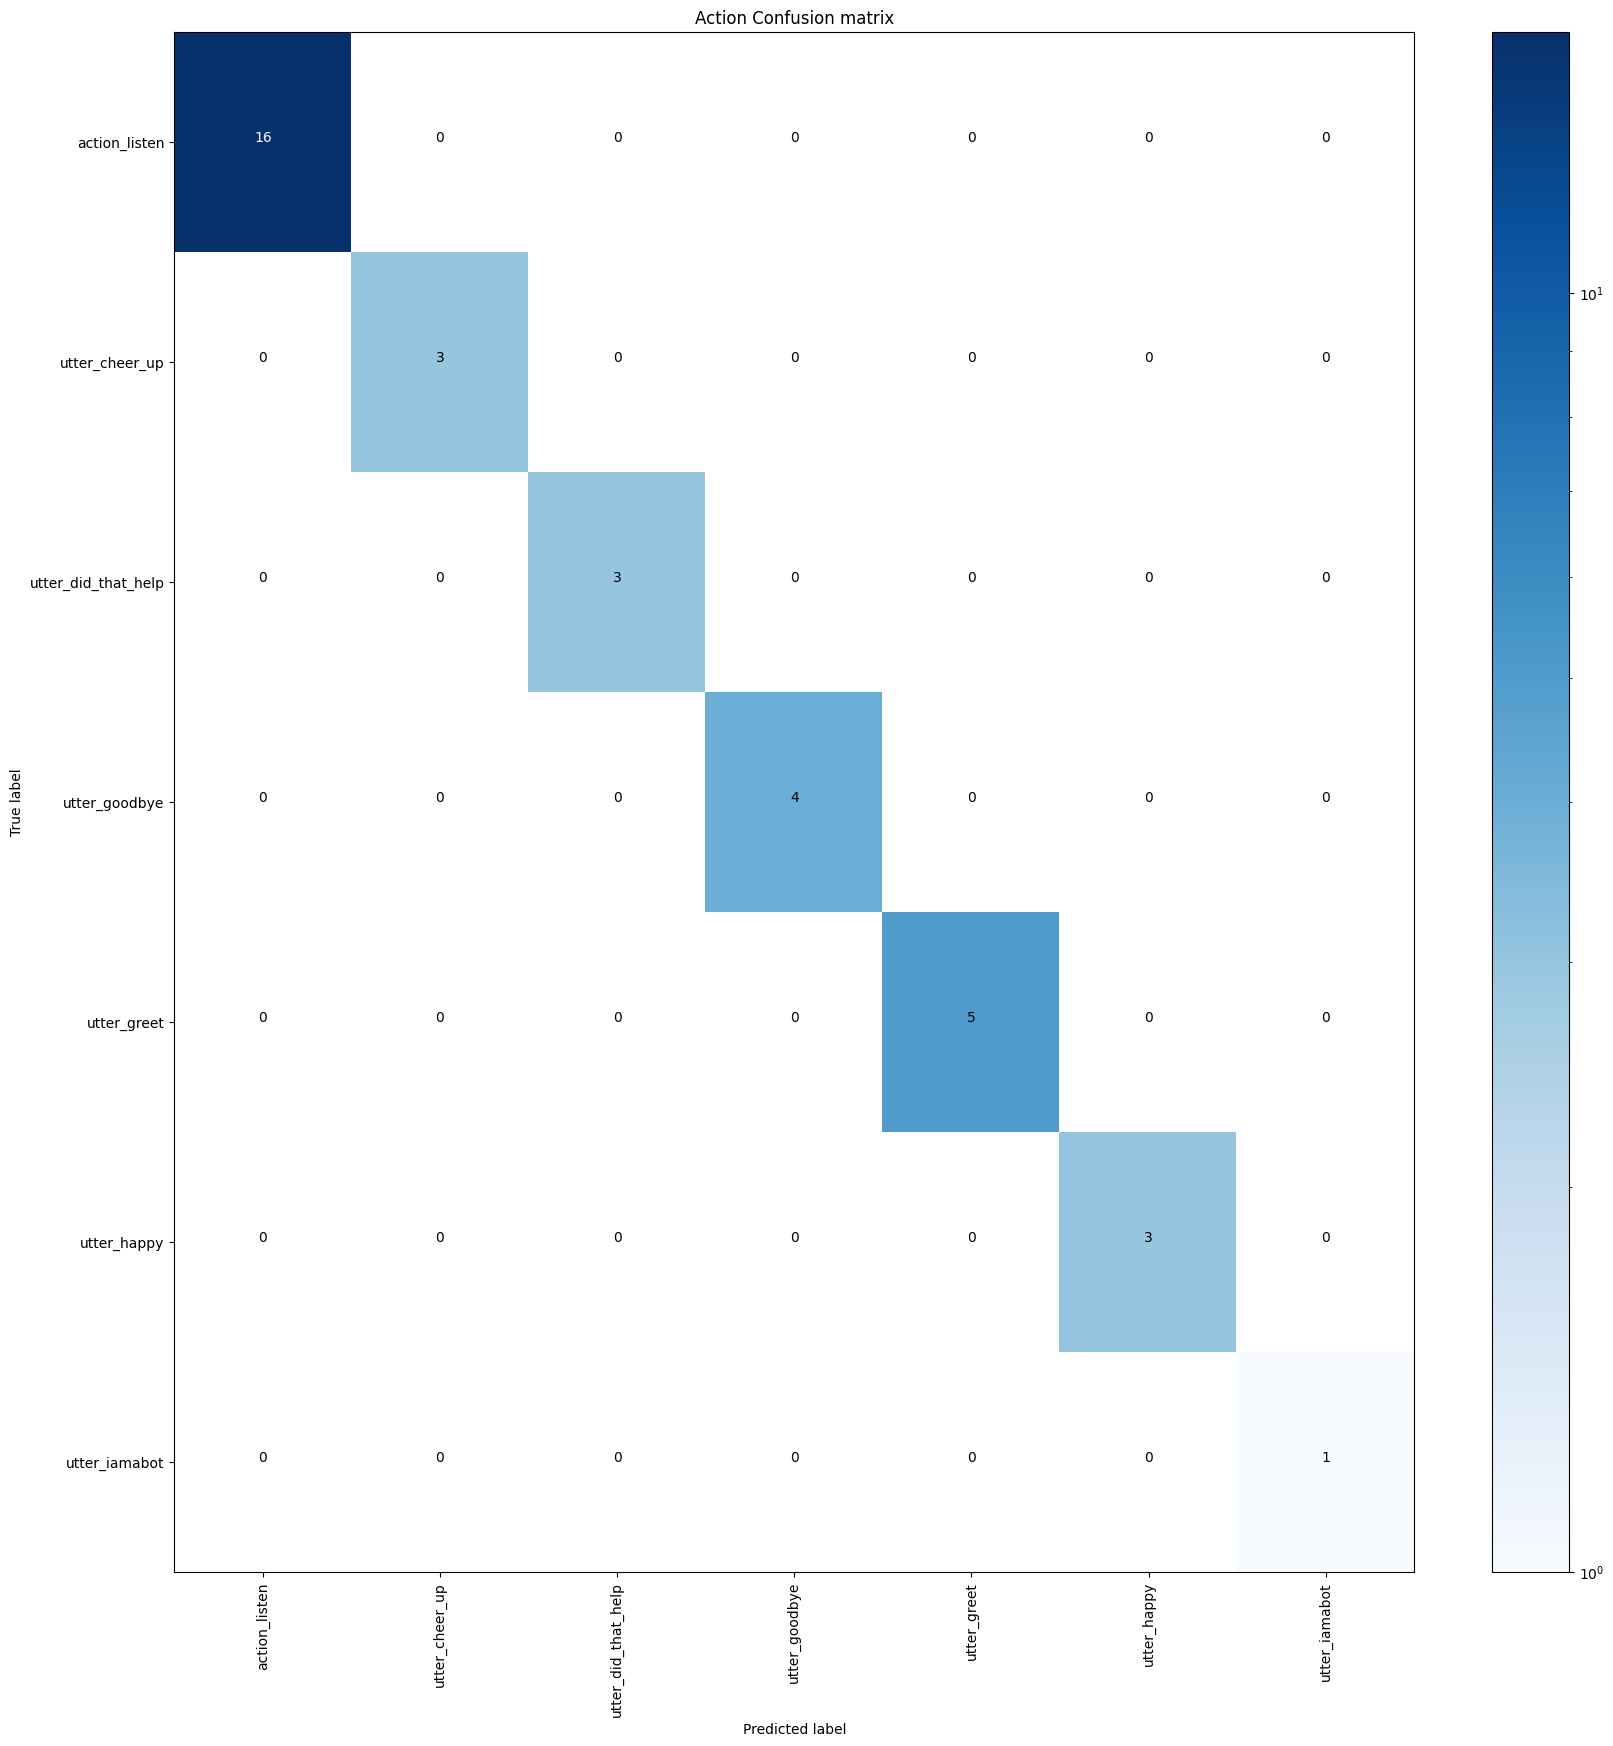

# PARTIE 3 : DEVELOPPEMENT DU CHATBOT

EXEMPLE DE DIALOGUE 3 et COMMENTAIRE ASSOCIÉ

Your input ->  hey dude                                                   
Hey! How are you?
Your input ->  I don't feel very well                                     
Here is something to cheer you up:
Image: https://i.imgur.com/nGF1K8f.jpg
Did that help you?
Your input ->  indeed                                                     
Great, carry on!
Your input ->  are you a human?                                           
I am a bot, powered by Rasa.
Your input ->  cu                                                         
Bye


Story 3 et Commentaire

version: "2.0"
stories:
- story: Story from Conversation ID 1809a59495c146079c1beff4d431ac3f
  steps:
  - intent: greet
  - action: utter_greet
  - intent: mood_unhappy
  - action: utter_cheer_up
  - action: utter_did_that_help
  - intent: affirm
  - action: utter_happy
  - intent: bot_challenge
  - action: utter_iamabot
  - intent: goodbye
  - action: utter_goodbye


# PARTIE 4 : EVOLUTION DU CHATBOT

oui, après un training + sélection nouveau modele

thank_you

affirm_thank_you

La rubrique Training regroupe tout les élément nécessaires à la modification des models NLU et CORE de notre chatbot, avec une IHM intuitive, un système de tag par intent ou encore une flow map des réponses

Une fois les modifications prise en compte en procédant à un nouveau training, un nouveau model est généré, il ne nous reste qu'à l'activer pour appliqué les nouvelles connaissances dans le chat

tout les fichier data ont été updaté avec les exemples, rules et stories données. domaine est également à jour

# PARTIE 5 : COMPREHENSION ou NLU - 
#### COMMENT CA MARCHE ? 

en_core_web_md: middle sized english model trained on written web text

fr_core_news_md : middle sized french model trained on deep-sequoia corpus (inria), wikipedia (wikiNER) and others

In [18]:
%matplotlib inline
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

In [19]:
# Positionnez-vous dans le bon répertoire à l'aide du code python suivant
import os

PATH = '/home/poney/Desktop/InteractionAvancee/CHATBOT_DELAUNAY/'
os.chdir(PATH)
os.listdir()

['actions', 'credentials.yml', 'config.yml', 'events.db', 'results', 'domain.yml', 'events.db-wal', 'endpoints.yml', 'tests', 'models', 'rasa.db', 'events.db-shm', 'data']

In [20]:
import rasa.nlu
import rasa.core
import spacy

print("rasa.nlu: {} rasa.core: {}".format(rasa.nlu.__version__, rasa.core.__version__))
print("Loading spaCy language model...")
print(spacy.load('fr_core_news_md')("Bonjour chez vous! Le modèle français est chargé"))  # si le lien existe
#print(spacy.load('fr_core_news_md')("Bonjour chez vous! Le modèle français est chargé"))  
print(spacy.load('en_core_web_md')("Hello world! The English model has been loaded"))    # si le lien existe
#print(spacy.load('en_core_web_md')("Hello world! The English model has ben loaded"))

rasa.nlu: 2.8.0 rasa.core: 2.8.0
Loading spaCy language model...
Bonjour chez vous! Le modèle français est chargé
Hello world! The English model has been loaded


In [25]:
import os
from rasa.shared.nlu.training_data.loading import load_data
from rasa.nlu.config import RasaNLUModelConfig
from rasa.nlu.model import Trainer
from rasa.nlu import config
from os import system

# Adapter le chemin à votre contexte
PATH = '/home/poney/Desktop/InteractionAvancee/CHATBOT_DELAUNAY/'
os.chdir(PATH)
os.listdir()
#Compléter avec le chemin vers votre environnement virtuel créé lors du 1er TP
PATHENV = '/home/miniconda3/envs/env_rasa2.8/'
print(os.getcwd())
print(os.listdir('data'))
warnings.filterwarnings('ignore')

# loading the nlu training samples
training_data = load_data("./data/nlu.yml")

# trainer to educate our pipeline 
# décommenter le pipeline si besoin
trainer = Trainer(config.load("./config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa.nlu.model:Starting to train component WhitespaceTokenizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component RegexFeaturizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component LexicalSyntacticFeaturizer
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component CountVectorsFeaturizer
INFO:rasa.nlu.featurizers.sparse_featurizer.count_vectors_featurizer:84 vocabulary items were created for text attribute.


/home/poney/Desktop/InteractionAvancee/CHATBOT_DELAUNAY
['rules.yml', 'stories.yml', 'nlu.yml']


INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component CountVectorsFeaturizer
INFO:rasa.nlu.featurizers.sparse_featurizer.count_vectors_featurizer:722 vocabulary items were created for text attribute.
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component DIETClassifier
Epochs: 100%|██████████| 100/100 [00:40<00:00,  2.46it/s, t_loss=1.26, i_acc=0.988]
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component EntitySynonymMapper
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component ResponseSelector
INFO:rasa.nlu.selectors.response_selector:Retrieval intent parameter was left to its default value. This response selector will be trained on training examples combining all retrieval intents.
INFO:rasa.nlu.model:Finished training component.
INFO:rasa.nlu.model:Starting to train component FallbackClassifier
INFO:rasa.nlu.model:F

On observe tout d'abord l'ordre dans lequel les fichiers de configuration sont chargé. 
    * rules : les règles statiques de conversations
    * stories : les stories d'entrainement pour le dialog management
    * nlu : les exemple pour la compréhension du langage naturel

Les premiers message d'erreurs traduisent l'abscence d'une GPU sur le pc utilisé.

Le reste de la trace renseigne sur la methode utilisée par tensorflow pour la cpu disponible

Enfin on a accès à la progression de l'entrainement, avec 100 epochs, et des statistique de perte et de précision

La première et la troisième partie traduit l'entrainement des composants de la pipeline
S'en suit l'entrainement du Classificateur DIET et reprend les informations citées plus tôt
On apprend ensuite où est sauvegardée le modèle tout juste créé


In [24]:
#PATH = '/Users/ferrane/Documents/ENSEIGNEMENT/SRI-3A/DOHM/BE_2020/TP_RASA_2020/CHATBOTS/CHATBOT_INIT_RASA2'
#os.chdir(PATH)
#os.listdir()
#Compléter avec le chemin vers votre environnement virtuel créé lors du 1er TP
print(os.getcwd())
print(os.listdir('models/nlu/current'))
warnings.filterwarnings('ignore')

/home/poney/Desktop/InteractionAvancee/CHATBOT_DELAUNAY
['component_3_CountVectorsFeaturizer.pkl', 'component_5_DIETClassifier.sparse_feature_sizes.pkl', 'component_5_DIETClassifier.entity_tag_specs.json', 'component_4_CountVectorsFeaturizer.pkl', 'component_5_DIETClassifier.index_label_id_mapping.json', 'metadata.json', 'component_5_DIETClassifier.tf_model.data-00000-of-00001', 'component_5_DIETClassifier.tf_model.index', 'checkpoint', 'component_5_DIETClassifier.label_data.pkl', 'component_1_RegexFeaturizer.patterns.pkl', 'component_2_LexicalSyntacticFeaturizer.feature_to_idx_dict.pkl', 'component_5_DIETClassifier.data_example.pkl']


In [23]:
pprint(interpreter.parse("I would rather prefer a puppy"))

{
  "text": "I would rather prefer a puppy",
  "intent": {
    "id": 7962175321542090791,
    "name": "mood_great",
    "confidence": 0.8323944807052612
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 0.8323944807052612
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 0.08072361350059509
    },
    {
      "id": -2150656237830080241,
      "name": "goodbye",
      "confidence": 0.05433756113052368
    },
    {
      "id": 1391882739350919250,
      "name": "affirm",
      "confidence": 0.009740544483065605
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 0.00688455905765295
    },
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.005612300243228674
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 0.005595414899289608
    },
    {
   

In [26]:
pprint(interpreter.parse("I am fine thanks"))

{
  "text": "I am fine thanks",
  "intent": {
    "id": 6769391650229738036,
    "name": "thank_you",
    "confidence": 0.9999418258666992
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.9999418258666992
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 3.5957928048446774e-05
    },
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 7.41801704862155e-06
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 4.1421139940212015e-06
    },
    {
      "id": -2150656237830080241,
      "name": "goodbye",
      "confidence": 3.733380026460509e-06
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 3.6571741475199815e-06
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 2.1339187696867157e-06
    },
    {
     

In [27]:
pprint(interpreter.parse("Thank you"))

{
  "text": "Thank you",
  "intent": {
    "id": 6769391650229738036,
    "name": "thank_you",
    "confidence": 0.9999872446060181
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.9999872446060181
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 7.049869054753799e-06
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 1.619677050257451e-06
    },
    {
      "id": -2150656237830080241,
      "name": "goodbye",
      "confidence": 1.120680281019304e-06
    },
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 9.8860641628562e-07
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 9.077163554138679e-07
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 8.075074902080814e-07
    },
    {
      "id": 13918

In [28]:
pprint(interpreter.parse("I would prefer a puppy"))

{
  "text": "I would prefer a puppy",
  "intent": {
    "id": 7962175321542090791,
    "name": "mood_great",
    "confidence": 0.9541443586349487
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 0.9541443586349487
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 0.03265368565917015
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 0.010416571982204914
    },
    {
      "id": 1391882739350919250,
      "name": "affirm",
      "confidence": 0.0013655766379088163
    },
    {
      "id": -2150656237830080241,
      "name": "goodbye",
      "confidence": 0.0006306066643446684
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 0.0004510425205808133
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 0.00020558887626975775
    },
    {
      

In [29]:
pprint(interpreter.parse("I would have prefered a puppy"))

{
  "text": "I would have prefered a puppy",
  "intent": {
    "id": 7962175321542090791,
    "name": "mood_great",
    "confidence": 0.9298133850097656
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 0.9298133850097656
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 0.04645534232258797
    },
    {
      "id": -2150656237830080241,
      "name": "goodbye",
      "confidence": 0.01662510819733143
    },
    {
      "id": 1391882739350919250,
      "name": "affirm",
      "confidence": 0.0035177452955394983
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 0.0015461128205060959
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 0.0009943171171471477
    },
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.0005878786905668676
    },
 

In [30]:
pprint(interpreter.parse("I would like to thank you very much for this"))

{
  "text": "I would like to thank you very much for this",
  "intent": {
    "id": 6769391650229738036,
    "name": "thank_you",
    "confidence": 0.9531809687614441
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.9531809687614441
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 0.02490748092532158
    },
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 0.00733046093955636
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 0.006578986998647451
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 0.004278034903109074
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 0.002418717835098505
    },
    {
      "id": 1391882739350919250,
      "name": "affirm",
      "confidence": 0.0007355895941145718
  

In [31]:
pprint(interpreter.parse("I would like to thank you very much for this"))

{
  "text": "I would like to thank you very much for this",
  "intent": {
    "id": 6769391650229738036,
    "name": "thank_you",
    "confidence": 0.9531809687614441
  },
  "entities": [],
  "intent_ranking": [
    {
      "id": 6769391650229738036,
      "name": "thank_you",
      "confidence": 0.9531809687614441
    },
    {
      "id": -3328487466430830519,
      "name": "bot_challenge",
      "confidence": 0.02490748092532158
    },
    {
      "id": 7962175321542090791,
      "name": "mood_great",
      "confidence": 0.00733046093955636
    },
    {
      "id": -3200069111705319308,
      "name": "mood_unhappy",
      "confidence": 0.006578986998647451
    },
    {
      "id": 439722329564345982,
      "name": "deny",
      "confidence": 0.004278034903109074
    },
    {
      "id": -4768358438815236693,
      "name": "greet",
      "confidence": 0.002418717835098505
    },
    {
      "id": 1391882739350919250,
      "name": "affirm",
      "confidence": 0.0007355895941145718
  

Commentaires sur les résultats obtenus

Les résultats obtenues suivent une architecture commune : 
le texte analysé,
l'intention discernée
les entités présentes (ici aucunes)
le classement des intents en fonction de leurs scores de confiance,
le sélectionneur de réponse également vide

# PARTIE 6 : Evolution du chatbot (suite) et évaluation

Il est nécessaire de créer un intent request_picture avec les phrases exemples et une reponse utter_picture lié, ainsi que toutes les dépandences liée (nlu, stories etc), 

il est nécessaire de rajouter des entités pour les animaux : puppy, butterfly, koala, action personnalisée récupérant les images en fonction des entités